## Setup ## 

In [11]:
"""Visualize embeddings produced"""
import numpy as np
import tensorflow as tf 
import h5py
import matplotlib.pyplot as plt
import os

from skimage import measure

import utils
import nearest_vectors

%load_ext autoreload
%autoreload 2

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

ROOT = '/usr/people/kluther/Projects/metric_segmentation/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

## Compute center vectors, pixel centroids, for each object ## 

In [5]:
"""Load data"""
em_imgs  = h5py.File(os.path.join(ROOT, 'data', 'image.h5'), 'r')['main']
seg_imgs = h5py.File(os.path.join(ROOT, 'data', 'human_labels.h5'), 'r')['main']

em_imgs_train = em_imgs[:192]
seg_imgs_train = seg_imgs[:192]
em_imgs_dev = em_imgs[192:]
seg_imgs_dev = seg_imgs[192:]

In [6]:
"""Load model"""
N = 30000 #Iteration number
EXP_NAME = 'boundary_mask_on_augment_on_random_windows'
MODEL_NAME = os.path.join(ROOT, 'experiments', EXP_NAME, 'models', 'model{}.ckpt'.format(N))

tf.reset_default_graph()
sess = tf.Session()
inputs, outputs = utils.load_model(MODEL_NAME, sess)

INFO:tensorflow:Restoring parameters from /usr/people/kluther/Projects/metric_segmentation/experiments/boundary_mask_on_augment_on_random_windows/models/model30000.ckpt


In [42]:
"""Get centroids, mean vectors for each object (note only sampling a region from each image right now)"""
# Train
centroids_dev, vectors_dev = {}, {} 
for i in range(len(em_imgs_dev)):
    if i % 5 == 0: print("Processing img: {}".format(i))
    em_img, seg_img = em_imgs_dev[i][:572,:572], seg_imgs_dev[i][92:572-92,92:572-92]
    vec_img = utils.generate_vector_labels(inputs, outputs, em_img, sess)
    centroids, vectors = nearest_vectors.find_object_ids_centroids_vectors([seg_img], [vec_img])
    
    centroids = [(2**15*i+ID, val) for ID,val in centroids.items()]
    vectors = [(2**15*i+ID, val) for ID,val in vectors.items()]
    centroids_dev.update(centroids)
    vectors_dev.update(vectors)
    


Processing img: 0
Processing img: 1
Processing img: 2
Processing img: 3
Processing img: 4
Processing img: 5
Processing img: 6
Processing img: 7
Processing img: 8
Processing img: 9
Processing img: 10
Processing img: 11
Processing img: 12
Processing img: 13
Processing img: 14
Processing img: 15
Processing img: 16
Processing img: 17
Processing img: 18
Processing img: 19
Processing img: 20
Processing img: 21
Processing img: 22
Processing img: 23
Processing img: 24
Processing img: 25
Processing img: 26
Processing img: 27
Processing img: 28
Processing img: 29
Processing img: 30
Processing img: 31
Processing img: 32
Processing img: 33
Processing img: 34
Processing img: 35
Processing img: 36
Processing img: 37
Processing img: 38
Processing img: 39
Processing img: 40
Processing img: 41
Processing img: 42
Processing img: 43
Processing img: 44
Processing img: 45
Processing img: 46
Processing img: 47
Processing img: 48
Processing img: 49
Processing img: 50
Processing img: 51
Processing img: 52
Pro

## Display nearest neighbors ##

In [51]:
list(centroids_dev)[:10]

[3, 4, 15, 16, 17, 23, 31, 52, 122, 125]

[(327695, 0.95997888), (1147046, 0.93794972), (98319, 0.93431753), (1081510, 0.9278056), (65551, 0.92353302)]


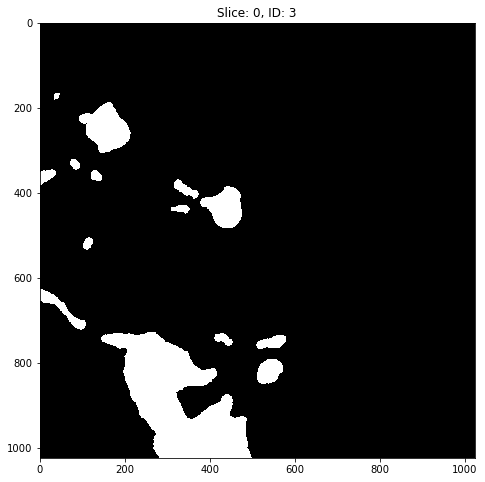

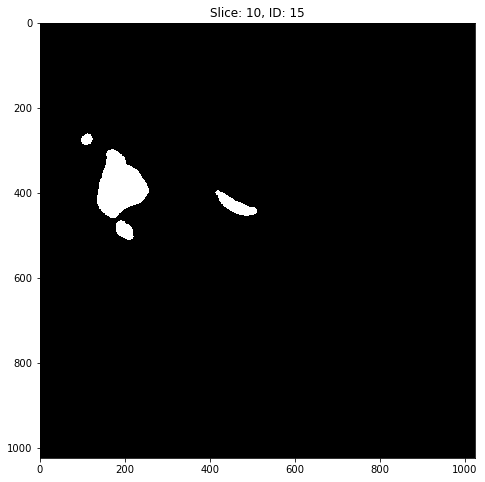

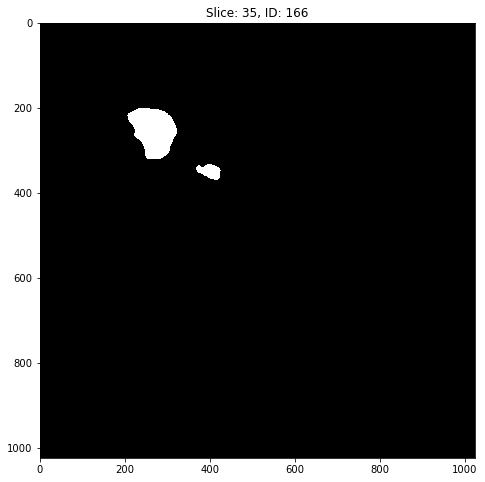

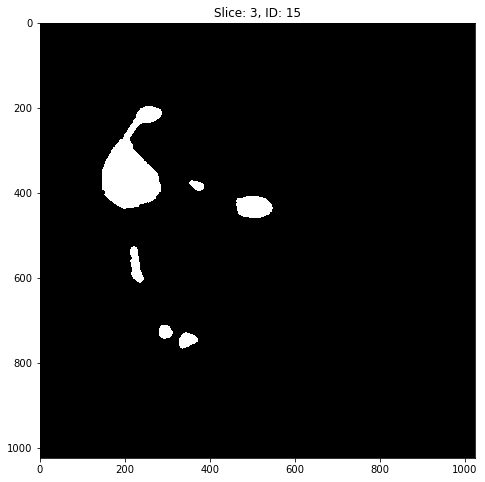

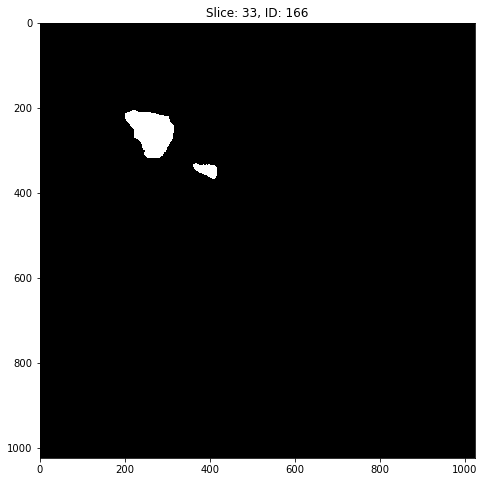

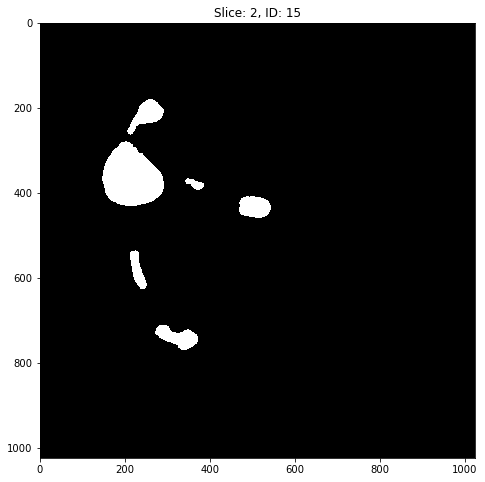

In [49]:
def show_k_nearest(vec_id, k, vectors):
    knn = nearest_vectors.k_nearest_neighbors(vectors, vec_id, k)
    ids = [(vec_id // 2**15, vec_id % 2**15)] + [(ID // 2**15, ID % 2**15) for ID, aff in knn]
    print(knn)
    for i,j in ids:
        seg_img = seg_imgs_dev[i]
        mask = np.zeros_like(seg_img)
        mask[seg_img==j] = 1
        plt.figure(figsize=(8,8))
        plt.title("Slice: {}, ID: {}".format(i,j))
        plt.imshow(mask, cmap='gray')
        plt.show()
    
show_k_nearest(3, 5, vectors_dev)